# Meetup Network Characterisation

This notebook applies a number of standard network characterisation approaches to the Dublin meetup network.

In [1]:
import ast
import networkx as nx
import pandas as pd
pd.set_option('precision', 3)
import numpy as np
import matplotlib.pyplot as plt
import pylab as plot
%matplotlib inline
# customise Matplotlib plots
font_size = 14
params = {'legend.fontsize': font_size, 'legend.handlelength': 2, 'font.size' : font_size, 'axes.titlesize' : font_size, 'ytick.labelsize' : font_size }
plot.rcParams.update(params)

File paths and settings:

In [2]:
# input files
network_path = "data/meetup-normalised-comembership.edges"
metadata_path = "data/meetup-metadata.csv"
# output files
out_path = "results/meetup-analysis-centrality.xlsx"

Read the meetup metadata:

In [3]:
df = pd.read_csv( metadata_path, sep = "|", index_col="Id", converters={7:ast.literal_eval} )
df.head(10)

,meetup_id,name,member_count,join_mode,description,created,categories
Id,,,,,,,
1,370896,New and Not So New In Dublin,21149,open,Welcome to New and Not So New Dublin s largest...,2006-11-22,[Socializing]
2,8749202,20-35 Somethin's,5575,open,20 35 somethings is a group for people in thei...,2013-06-02,[Socializing]
3,19190729,Machine Learning Dublin,4422,open,This is a last Monday of the month meetup grou...,2015-12-07,[Tech]
4,28444095,Data Science Festival - Dublin,688,open,The focus of this Meetup group is to provide f...,2018-05-10,[Tech]
5,11686062,"Events, Drinks and Dancing in Dublin",16582,open,This is not a dating site but accidents do hap...,2014-01-02,[Socializing]
6,18914126,Dublin UX,2638,open,Dublin UX is a meetup group for UX UI User Exp...,2015-09-09,[Tech]
7,22488033,Data Science and Engineering Club,1886,open,The Data Science and Engineering Club goals ar...,2017-02-20,[Tech]
8,18777156,Friends Forever!,6203,open,In most meetups in Dublin people never show up...,2015-07-27,[Socializing]
9,12511662,Docker Dublin,2393,open,Learn Collaborate Dockerize Meet other develop...,2014-01-27,[Tech]


Load the network, in space-separated format, with fields "node1 node2 weight":

In [4]:
def read_weighted_edgelist( in_path ):
    g = nx.Graph()
    fin = open(in_path,"r")
    for line in fin.readlines():
        parts = line.strip().split(" ")
        node1, node2 = int(parts[0]), int(parts[1])
        if node1 != node2:
            g.add_edge( node1, node2, weight=float(parts[2]) )
    fin.close()
    return g

In [5]:
g = read_weighted_edgelist(network_path)
print( "Network has %d nodes, %d edges" % ( g.number_of_nodes(), g.number_of_edges() ) )

Network has 1481 nodes, 708163 edges


Network density

In [6]:
nx.density(g)

0.6461694983302005

Examine distribution of edge weights

In [7]:
weights = []
for e in g.edges(data=True):
    weights.append( e[2]["weight"] )
weights = pd.Series(weights)
weights.describe()

count    7.082e+05
mean     7.690e-03
std      1.035e-02
min      4.700e-05
25%      2.224e-03
50%      4.525e-03
75%      9.132e-03
max      1.000e+00
dtype: float64

How many low weights do we have?

In [8]:
num_weights = len(weights)
num_low = len(weights[weights<=0.1])
100 * num_low/num_weights

99.88279534513947

In [9]:
num_weights = len(weights)
num_low = len(weights[weights<=0.01])
100 * num_low/num_weights

77.70795706638161

Plot a histogram of all weights:

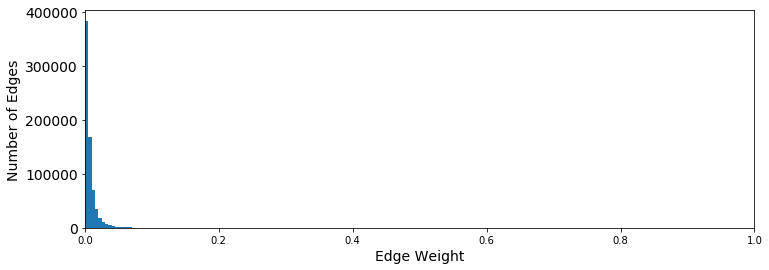

In [10]:
p = weights.hist( grid = False, bins = 200, figsize=(12,4) )
p.set_xlim( (0,1) )
p.set_ylabel("Number of Edges", fontsize=font_size)
p.set_xlabel("Edge Weight", fontsize=font_size);
#plt.savefig('figures/hist-edge-weights.pdf', bbox_inches='tight')

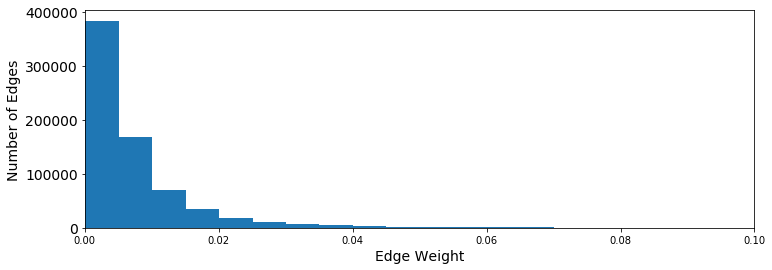

In [11]:
p = weights.hist( grid = False, bins = 200, figsize=(12,4) )
p.set_xlim( (0,0.1) )
p.set_ylabel("Number of Edges", fontsize=font_size);
p.set_xlabel("Edge Weight", fontsize=font_size);
#plt.savefig('figures/hist-edge-weights-zoom.pdf', bbox_inches='tight')

Measure node *weighted degree* centrality

In [12]:
wdegree = dict(g.degree(weight="weight"))
df["Weighted Degree"] = pd.Series(wdegree)

In [13]:
df.sort_values("Weighted Degree", ascending=False).head(20)

,meetup_id,name,member_count,join_mode,description,created,categories,Weighted Degree
Id,,,,,,,,
1453,18941331,Zalando Tech Events Dublin,926,open,Zalando is Europe s leading online fashion pla...,2015-09-17,[Tech],16.700
546,18330186,The Dublin Mastermind Group for Growth & Empow...,1872,open,The Dublin Mastermind Group is a community res...,2015-01-13,"[Health & Wellbeing, Support]",16.275
775,22329276,Dublin Artificial Intelligence & Deep Learning,1716,open,Welcome to the group We re excited to bring yo...,2017-02-11,[Tech],16.204
72,18554722,Tog Hackerspace,1641,open,TOG is a hackerspace based in Dublin City Cent...,2015-04-19,[Tech],15.924
73,19309553,Dublin - Coder Forge,1960,open,A place to learn how to forge out code to smyt...,2016-01-09,[Tech],15.872
105,20652547,Dublin TED Talks Discussions,3822,open,We are a group of people who enjoy discussing ...,2016-10-08,[Education & Learning],15.781
596,11345112,Dublin Startup Founder 101,3286,open,Startup Founder 101 brings together aspiring a...,2013-12-04,[Career & Business],15.772
271,20951122,CHAI Dublin (Chatbot & AI) Meetup,1006,open,Welcome to CHAI Dublin Group for chatbots deve...,2016-10-29,[Tech],15.706
528,7372652,TechMeetup.space,840,approval,Through our partnership with technology user a...,2013-02-27,[Tech],15.647


Measure node *weighted eigenvector* centrality

In [14]:
weig = dict(nx.eigenvector_centrality(g, weight="weight"))
df["W-Eigenvector"] = pd.Series(weig)

In [15]:
df.sort_values("W-Eigenvector", ascending=False).head(20)

,meetup_id,name,member_count,join_mode,description,created,categories,Weighted Degree,W-Eigenvector
Id,,,,,,,,,
775,22329276,Dublin Artificial Intelligence & Deep Learning,1716,open,Welcome to the group We re excited to bring yo...,2017-02-11,[Tech],16.204,0.066
166,15827312,Big Data Developers in Dublin,2278,open,This is an IBM sponsored Big Data Meetup group...,2014-07-19,[Tech],15.471,0.066
146,12960342,Data Scientists Ireland,3876,open,This is a new group dedicated to Data Sciences...,2014-02-19,[Tech],15.044,0.065
1453,18941331,Zalando Tech Events Dublin,926,open,Zalando is Europe s leading online fashion pla...,2015-09-17,[Tech],16.700,0.065
3,19190729,Machine Learning Dublin,4422,open,This is a last Monday of the month meetup grou...,2015-12-07,[Tech],14.887,0.064
7,22488033,Data Science and Engineering Club,1886,open,The Data Science and Engineering Club goals ar...,2017-02-20,[Tech],15.429,0.064
100,10888322,Hackers and Founders Dublin,3623,open,Hackers Founders Dublin is one of the biggest ...,2013-10-29,[Tech],15.533,0.064
1341,19147770,GDG Dublin,1888,open,GDG Dublin Google Developer Group meets on the...,2015-11-23,[Tech],15.504,0.064
596,11345112,Dublin Startup Founder 101,3286,open,Startup Founder 101 brings together aspiring a...,2013-12-04,[Career & Business],15.772,0.063


Measure node *weighted betweenness* centrality

In [16]:
weig = dict(nx.betweenness_centrality(g, weight="weight"))
df["W-Between"] = pd.Series(weig)

In [17]:
df.sort_values("W-Between", ascending=False).head(20)

,meetup_id,name,member_count,join_mode,description,created,categories,Weighted Degree,W-Eigenvector,W-Between
Id,,,,,,,,,,
1014,18215899,Speak English Dublin,13169,open,This is a group focused on English only we mee...,2014-11-26,[Language & Ethnic Identity],9.658,0.037,0.105
12,5252482,AWS User Group Dublin,2446,open,This is the AWS User Group Network We re a com...,2012-10-05,[Tech],11.601,0.049,0.047
1,370896,New and Not So New In Dublin,21149,open,Welcome to New and Not So New Dublin s largest...,2006-11-22,[Socializing],10.387,0.040,0.043
42,28255733,English Language Conversation with English Tea...,1435,open,If you are new Dublin or just want to develop ...,2018-04-23,[Language & Ethnic Identity],6.552,0.018,0.035
5,11686062,"Events, Drinks and Dancing in Dublin",16582,open,This is not a dating site but accidents do hap...,2014-01-02,[Socializing],12.617,0.049,0.033
16,6943212,Python Ireland,4837,open,Python Ireland is a group for anyone intereste...,2013-01-30,[Tech],13.656,0.059,0.032
6,18914126,Dublin UX,2638,open,Dublin UX is a meetup group for UX UI User Exp...,2015-09-09,[Tech],9.597,0.038,0.029
38,8679002,Dublin Indoor Football at The Soccer Dome,1485,open,Relocated to our new state of the art venue Th...,2013-05-28,"[Fitness, Sports & Recreation]",3.848,0.012,0.026
120,20506872,Dublin LGBT Social Meetup,1857,open,A group for LGBT people to meet up and chat so...,2016-09-29,[LGBT],7.477,0.021,0.023


Export centrality results to Excel

In [18]:
print("Writing %s" % out_path)
writer = pd.ExcelWriter(out_path)
df.to_excel(writer, "Centrality")
writer.save()

Writing results/meetup-analysis-centrality.xlsx
